<a href="https://colab.research.google.com/github/ziadelsharawy/Test/blob/main/Task_smoke_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import library

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Read data

In [28]:
df=pd.read_csv("/content/smoke_detection_iot.csv")

In [29]:
df.head()

,num,UTC,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT,Fire_Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [30]:
df.tail()

,num,UTC,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT,Fire_Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [31]:
df.shape

(62630, 16)

In [32]:
df.columns

Index(['num', 'UTC', 'Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2',
       'Raw_Ethanol', 'Pressure', 'PM1', 'PM2', 'NC0', 'NC1', 'NC2', 'CNT',
       'Fire_Alarm'],
      dtype='object')

In [33]:
df.describe()

,num,UTC,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT,Fire_Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num          62630 non-null  int64  
 1   UTC          62630 non-null  int64  
 2   Temperature  62630 non-null  float64
 3   Humidity     62630 non-null  float64
 4   TVOC         62630 non-null  int64  
 5   eCO2         62630 non-null  int64  
 6   Raw_H2       62630 non-null  int64  
 7   Raw_Ethanol  62630 non-null  int64  
 8   Pressure     62630 non-null  float64
 9   PM1          62630 non-null  float64
 10  PM2          62630 non-null  float64
 11  NC0          62630 non-null  float64
 12  NC1          62630 non-null  float64
 13  NC2          62630 non-null  float64
 14  CNT          62630 non-null  int64  
 15  Fire_Alarm   62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [35]:
df.isnull().sum()

num            0
UTC            0
Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw_H2         0
Raw_Ethanol    0
Pressure       0
PM1            0
PM2            0
NC0            0
NC1            0
NC2            0
CNT            0
Fire_Alarm     0
dtype: int64

In [36]:
df["Fire_Alarm"].value_counts()

1    44757
0    17873
Name: Fire_Alarm, dtype: int64

## Visualization Data

<Axes: ylabel='Fire_Alarm'>

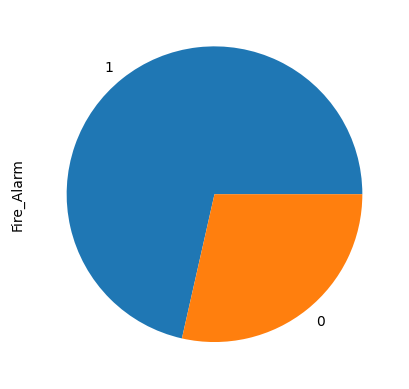

In [37]:
df.Fire_Alarm.value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Cout of Temperature')

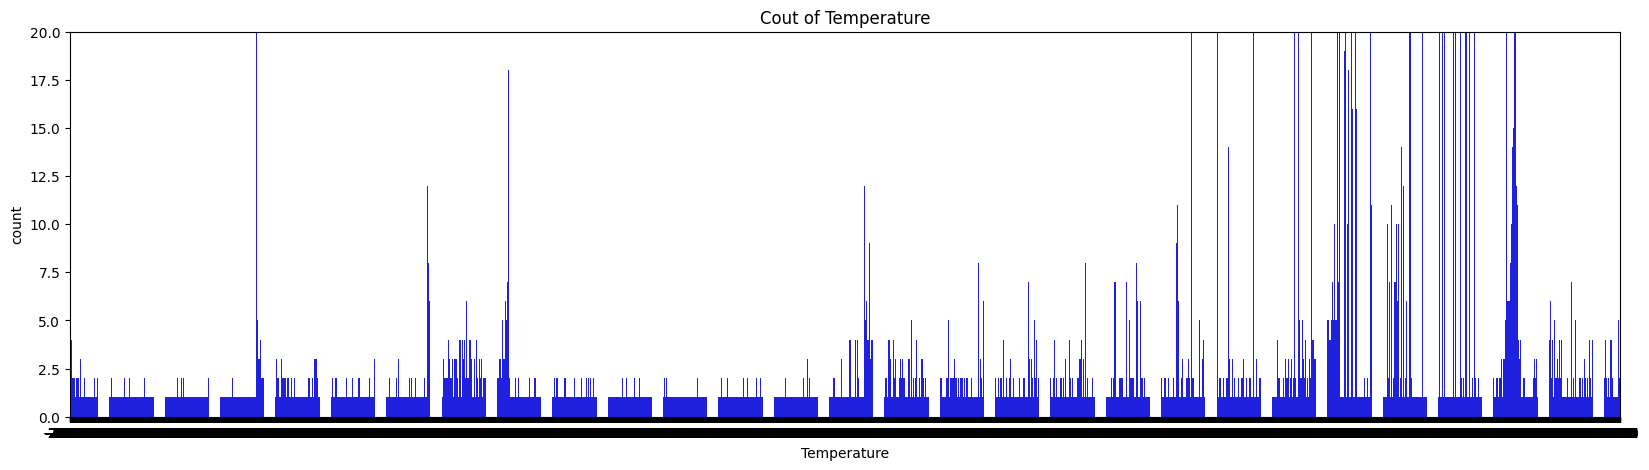

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(x='Temperature',data = df, color='b')
plt.ylim(0,20)
plt.title("Cout of Temperature")

In [39]:
corr=df.corr()
corr

,num,UTC,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT,Fire_Alarm
num,1.000000,0.551987,0.425636,-0.498121,0.248813,0.160665,-0.232854,0.083094,-0.580829,0.151785,0.128487,0.162053,0.126418,0.100300,-0.053262,-0.361351
UTC,0.551987,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
Temperature,0.425636,-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity,-0.498121,-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC,0.248813,0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2,0.160665,0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw_H2,-0.232854,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw_Ethanol,0.083094,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure,-0.580829,-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1,0.151785,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552


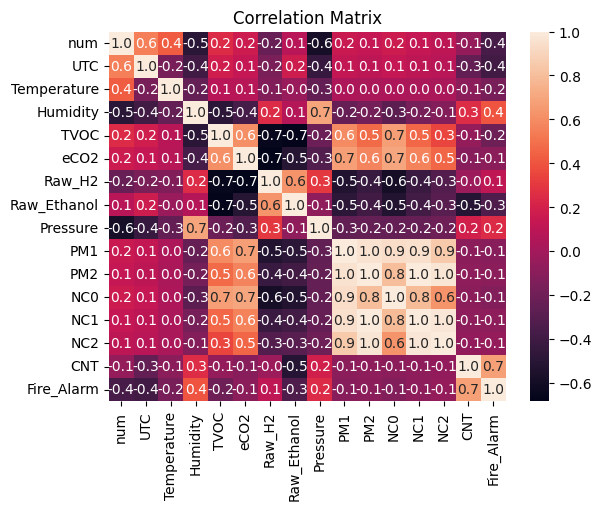

In [40]:
sns.heatmap(corr, annot=True, fmt=".1f")

plt.title("Correlation Matrix")

plt.show()

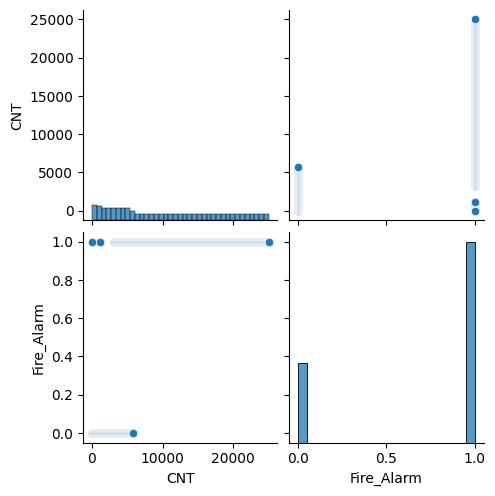

In [54]:

train_data = pd.concat([df["CNT"]	,df["Fire_Alarm"]], axis=1)

# Plot pair plot
sns.pairplot(train_data)
plt.show()


## Clear Data

In [42]:
df.fillna(df.median(), inplace=True)

In [43]:
df.isnull().sum()

num            0
UTC            0
Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw_H2         0
Raw_Ethanol    0
Pressure       0
PM1            0
PM2            0
NC0            0
NC1            0
NC2            0
CNT            0
Fire_Alarm     0
dtype: int64

In [44]:
df.drop('num', axis=1, inplace=True)

In [45]:
df.drop('UTC', axis=1, inplace=True)

In [46]:
df.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol',
       'Pressure', 'PM1', 'PM2', 'NC0', 'NC1', 'NC2', 'CNT', 'Fire_Alarm'],
      dtype='object')

## Split data

In [47]:
X = df.drop('Fire_Alarm', axis=1)
y = df['Fire_Alarm']

In [48]:
X

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1,PM2,NC0,NC1,NC2,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742


In [49]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire_Alarm, Length: 62630, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50104, 13)
X_test shape: (12526, 13)
y_train shape: (50104,)
y_test shape: (12526,)


## Model KNN

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9997604981638193


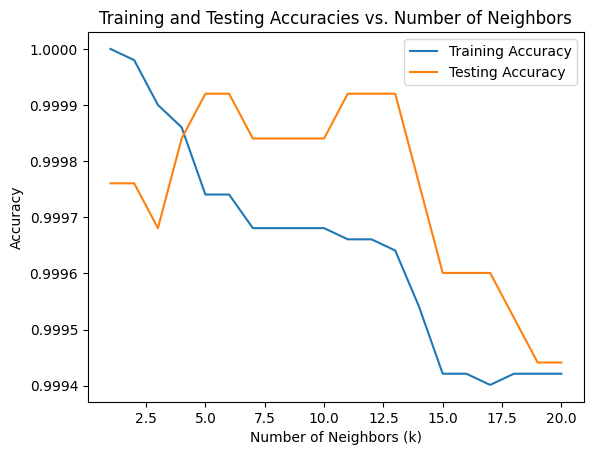

In [26]:
k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)


    knn.fit(X_train, y_train)


    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)


    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)


    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs. Number of Neighbors')
plt.legend()
plt.show()